## 0. 필요한 라이브러리 import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 살펴보기
pandas의 read_csv 함수를 사용해 데이터를 읽어오고, 연도별 어떤 변수들이 있는지 살펴보겠습니다.

In [3]:
train_2015 = pd.read_csv('Data/2015.csv')
print('2015', train_2015)
print()
train_2016 = pd.read_csv('Data/2016.csv')
print('2016', train_2016)
print()
train_2017 = pd.read_csv('Data/2017.csv')
print('2017', train_2017)
print()
train_2018 = pd.read_csv('Data/2018.csv')
print('2018', train_2018)
print()
train_2019 = pd.read_csv('Data/2019.csv')
print('2019', train_2019)
print()

2015          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7

In [6]:
train_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 2. 간단한 전처리 
각 변수들에 대해 결측 유무를 확인하고, 분포를 확인해보면서 간단하게 전처리를 하겠습니다.
### 결측치 확인
먼저 데이터에 결측치가 있는지를 확인하겠습니다.<br>
missingno 라이브러리의 matrix 함수를 사용하면, 데이터의 결측 상태를 시각화를 통해 살펴볼 수 있습니다.

<AxesSubplot:>

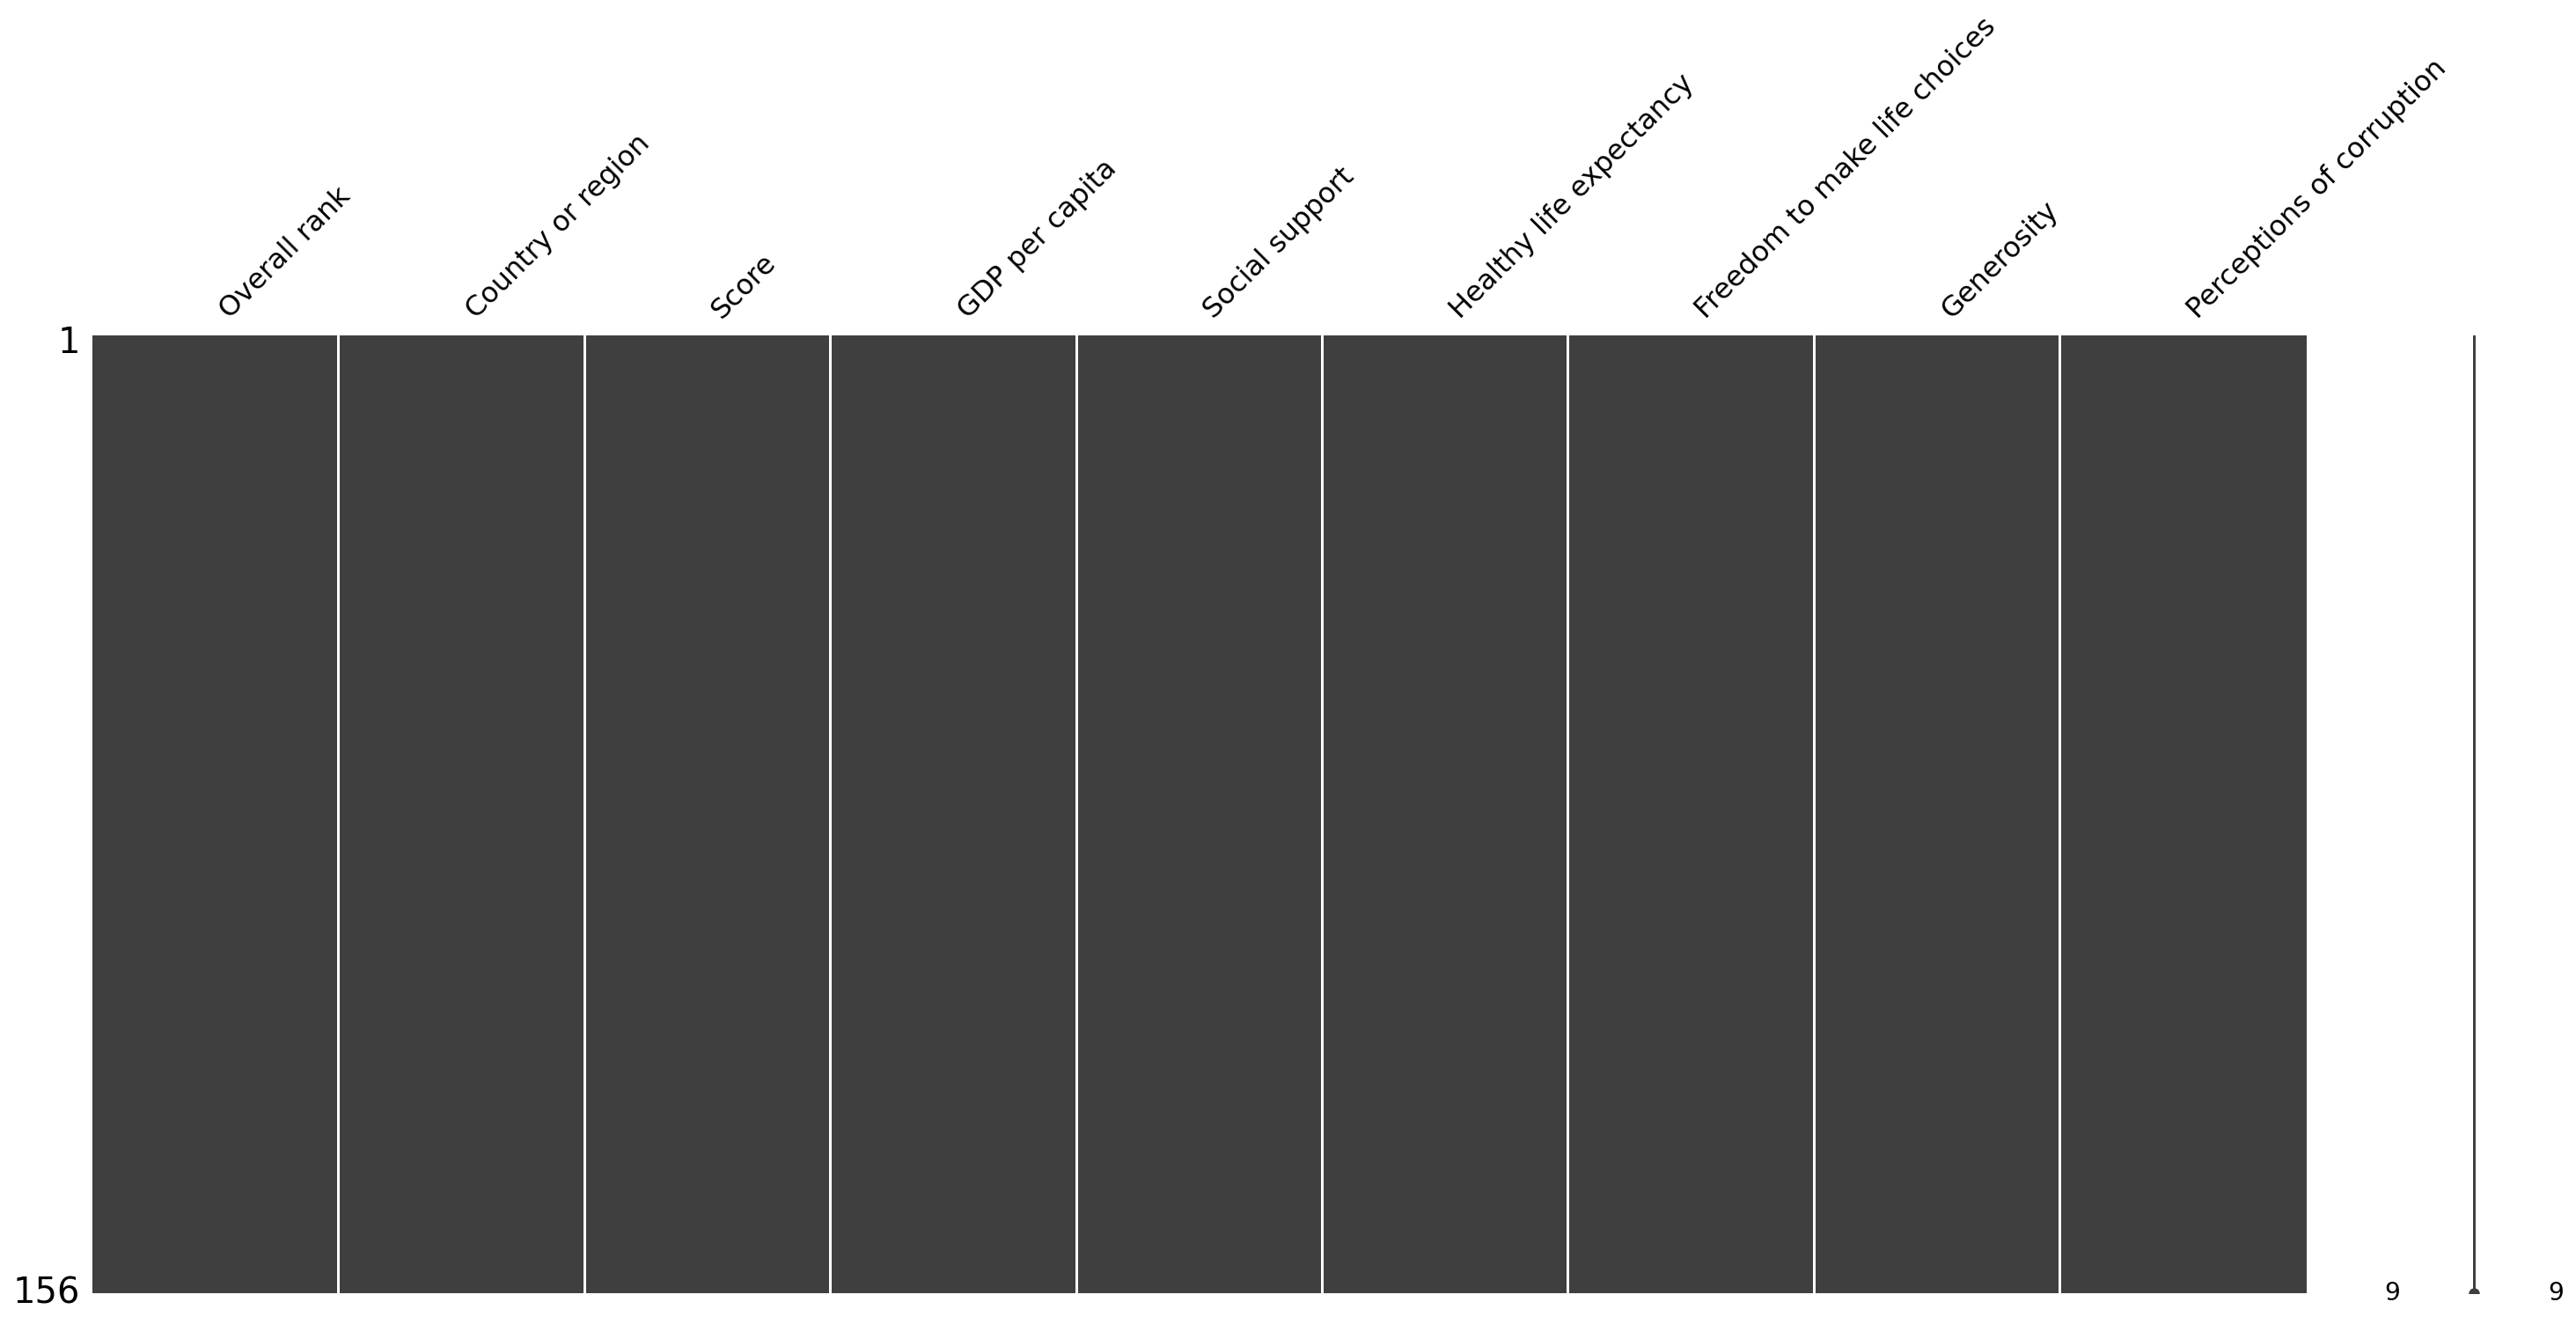

In [7]:
msno.matrix(train_2019)

모든 변수에 결측치가 없는 것으로 보이지만, 혹시 모르니 확실하게 살펴보겠습니다.<br>

In [8]:
for c in train_2019.columns:
    print('{} : {}'.format(c, len(train_2019.loc[pd.isnull(train_2019[c]), c].values)))

Overall rank : 0
Country or region : 0
Score : 0
GDP per capita : 0
Social support : 0
Healthy life expectancy : 0
Freedom to make life choices : 0
Generosity : 0
Perceptions of corruption : 0


### Overall Rank column 정리
Overall Rank column은 Score colume과 같은의미이므로 제거

In [10]:
sub_id = train_2019['Overall rank'][len(train_2019):]
del train_2019['Overall rank']

In [11]:
train_2019.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 각 요소들의 행복지수에 대한 상관관계 시각화
각 요소들이 행복지수에 얼마나 영향을 미치는지 시각화하여 확인

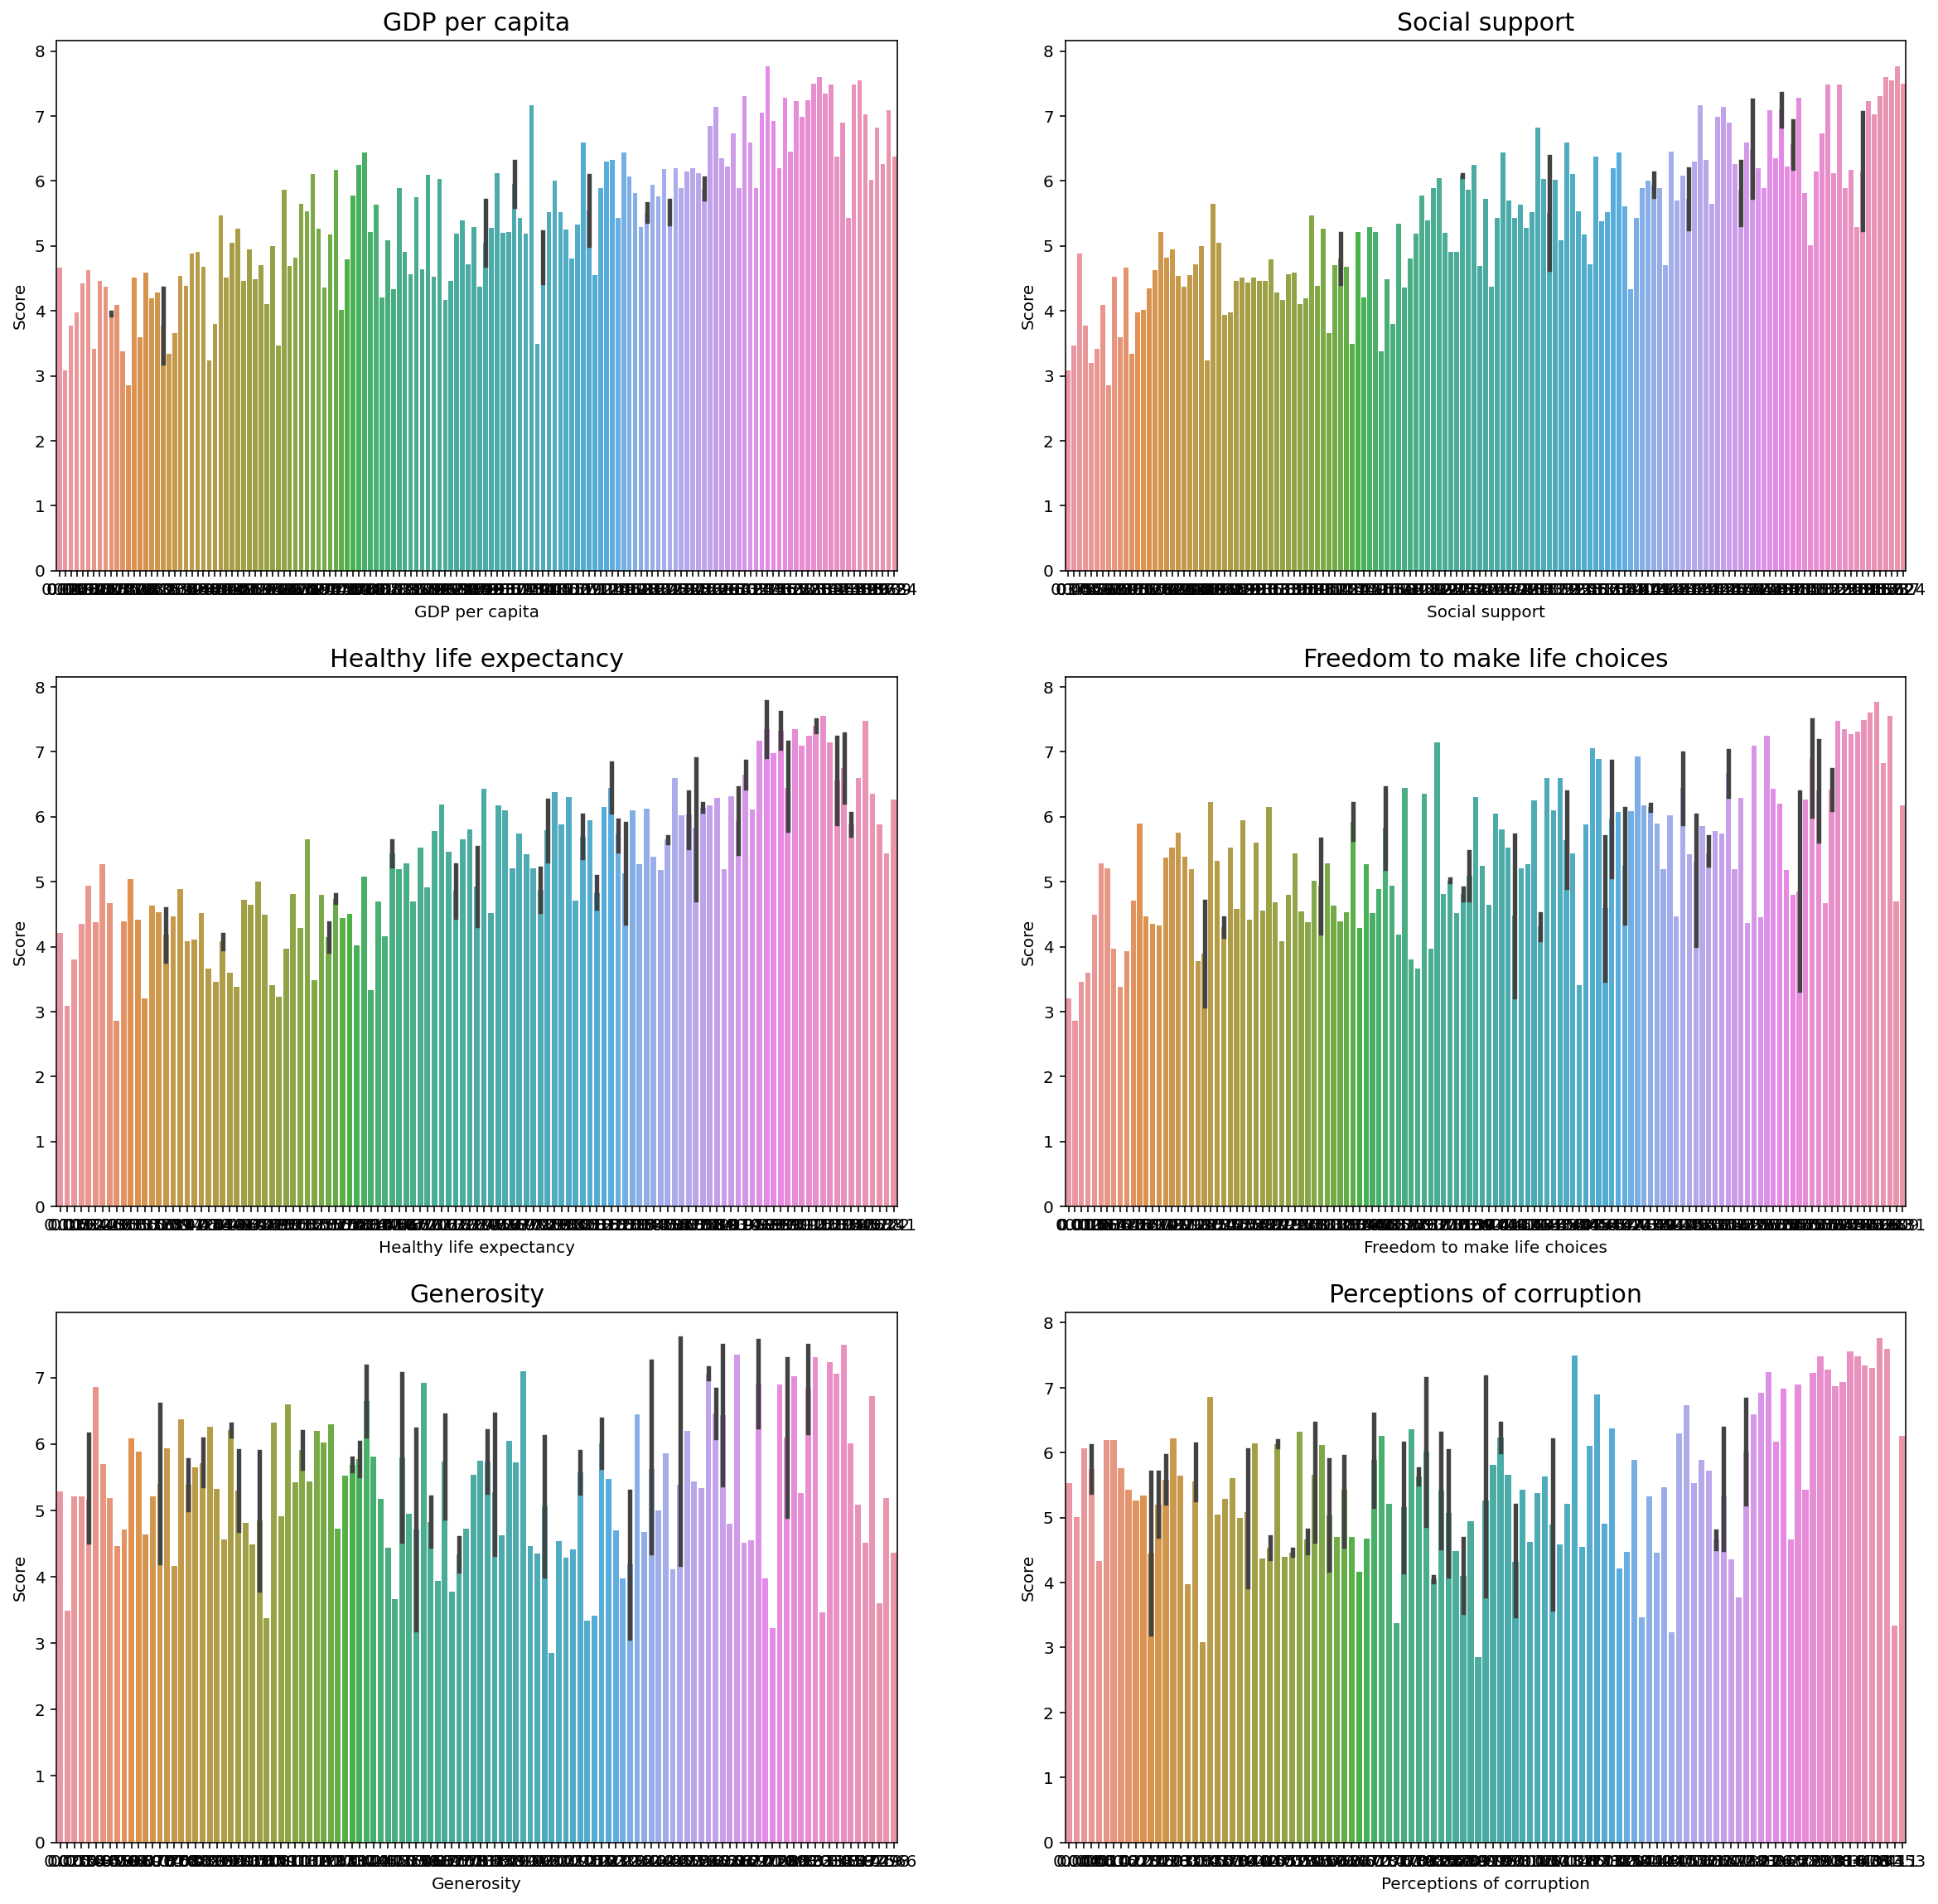

In [41]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Country 변수는 제외하고 시각화합니다.
count = 2
columns = train_2019.columns
for row in range(3):
    for col in range(2):
        if count == 8:
            break
        sns.barplot(data=train_2019, x=columns[count], y='Score', ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1


GDP per capita,	Social support,	Healthy life expectancy, Freedom to make life choices는 값이 증가함에 따라 행복도도 올라가는 경향을 보이나 Generosity와 Perceptions of corruption의 경우 큰 상관관계가 없어보인다.